1. Limpeza e Tratamento de Dados:
- Identificar e Lidar com Valores Ausentes:
Identifique valores ausentes em seu conjunto de dados usando métodos como .isnull() ou .info().
Decida como lidar com os valores ausentes, seja removendo as linhas, preenchendo os valores ausentes com a média, mediana, moda ou valores previamente definidos.
- Lidar com Dados Duplicados:
Identifique e remova linhas duplicadas usando .duplicated() e .drop_duplicates().
- Lidar com Outliers:
Identifique outliers através de visualizações, como boxplots ou histogramas, e decida se eles são erros nos dados ou informações relevantes.
Considere técnicas de tratamento de outliers, como truncamento, capping ou remoção.
- Formatar os Dados:
Converta os tipos de dados conforme necessário, como datas, strings ou números.
Renomeie colunas para tornar os nomes mais descritivos e fáceis de entender.
2. Exploração de Dados (Análise Exploratória de Dados - EDA):
- Visualização de Dados:
Utilize gráficos, como histogramas, gráficos de dispersão, boxplots, etc., para entender a distribuição e as relações entre variáveis.
- Estatísticas Descritivas:
Calcule estatísticas descritivas, como média, mediana, desvio padrão, quartis, etc., para entender a tendência central e a dispersão dos dados.
- Identificação de Padrões e Tendências:
Identifique padrões ou tendências nos dados que possam ser relevantes para o seu problema.
3. Preparação de Dados:
- Seleção de Características:
Selecione as características relevantes para o seu problema, descartando aquelas que não contribuem para a análise.
- Normalização e Escalonamento:
Normalize ou escale os dados, se necessário, para garantir que todas as características tenham a mesma escala.
- Codificação de Variáveis Categóricas:
Converta variáveis categóricas em formato numérico usando técnicas como one-hot encoding ou label encoding.
- Divisão do Conjunto de Dados:
Divida o conjunto de dados em conjuntos de treinamento e teste para modelagem posterior.

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [2]:
#importar dados
dataset = pd.read_csv("Churn.csv", sep=";")
#visulizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#tamanho
dataset.shape

(999, 12)

In [48]:
#primeiro problema é dar nomes as colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [8]:
#visulizar
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [9]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

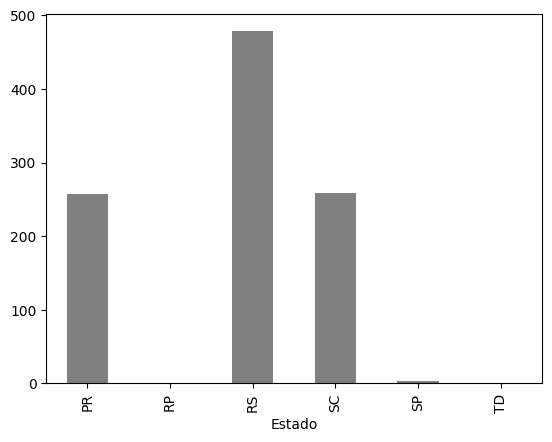

In [10]:
agrupado.plot.bar(color = 'gray')


In [30]:
contador_F = (dataset['Genero'] == 'F').sum()
contador_feminino = (dataset['Genero'] == 'Feminino').sum()
contador_Fem = (dataset['Genero'] == 'Fem').sum()

totalFeminino = (contador_F + contador_feminino + contador_Fem)

contador_M = (dataset['Genero'] == 'M').sum()
contador_Masculino = (dataset['Genero'] == 'Masculino').sum()

totalMasculino = (contador_M + contador_Masculino)



print("Número de elementos na coluna 'Genero' iguais a 'F':", totalFeminino)
print("Número de elementos na coluna 'Genero' iguais a 'M':", totalMasculino)
print("Número de elementos na coluna 'Genero' iguais a 'Total de Linhas':", totalMasculino + totalFeminino)


#Aqui vemos que que a coluna Genero está praticamente completa


Número de elementos na coluna 'Genero' iguais a 'F': 464
Número de elementos na coluna 'Genero' iguais a 'M': 527
Número de elementos na coluna 'Genero' iguais a 'Total de Linhas': 991


In [31]:

limpandoGenero = pd.DataFrame(dataset)

# Atualizando os valores na coluna 'Genero' para 'Feminino' onde o valor atual é 'F'
limpandoGenero.loc[limpandoGenero['Genero'] == 'F', 'Genero'] = 'Feminino'
limpandoGenero.loc[limpandoGenero['Genero'] == 'Fem', 'Genero'] = 'Feminino'
limpandoGenero.loc[limpandoGenero['Genero'] == 'M', 'Genero'] = 'Masculino'


       Id  Score Estado     Genero  Idade  Patrimonio     Saldo  Produtos  \
0       1    619     RS   Feminino     42           2         0         1   
1       2    608     SC   Feminino     41           1   8380786         1   
2       3    502     RS   Feminino     42           8   1596608         3   
3       4    699     RS   Feminino     39           1         0         2   
4       5    850     SC   Feminino     43           2  12551082         1   
..    ...    ...    ...        ...    ...         ...       ...       ...   
994   996    838     SC  Masculino     43           9  12310588         2   
995   997    610     SC  Masculino     29           9         0         3   
996   998    811     SC  Masculino     44           3         0         2   
997   999    587     SC  Masculino     62           7  12128627         1   
998  1000    811     PR   Feminino     28           4  16773882         2   

     TemCartCredito  Ativo     Salario  Saiu  
0                 1      1  

<Axes: xlabel='Genero'>

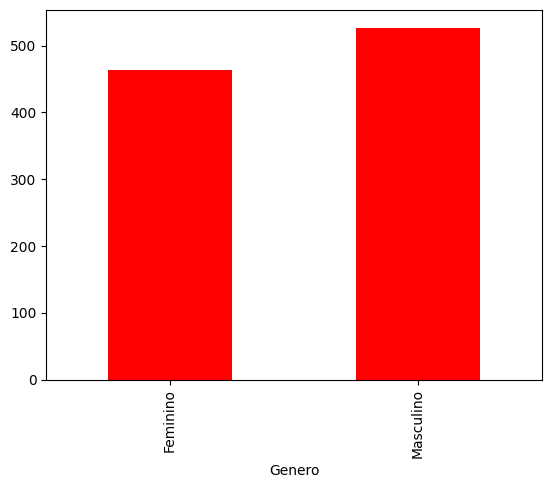

In [32]:
#genero
agrupadoGenero = dataset.groupby(['Genero']).size()
agrupadoGenero.plot.bar(color = 'red')


Text(0.5, 1.0, 'Score')

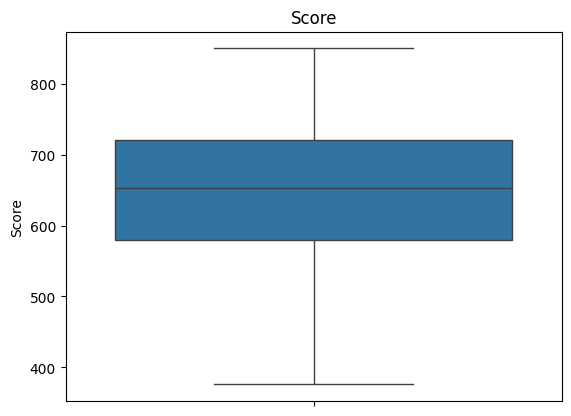

In [36]:
dataset['Score'].describe()
srn.boxplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

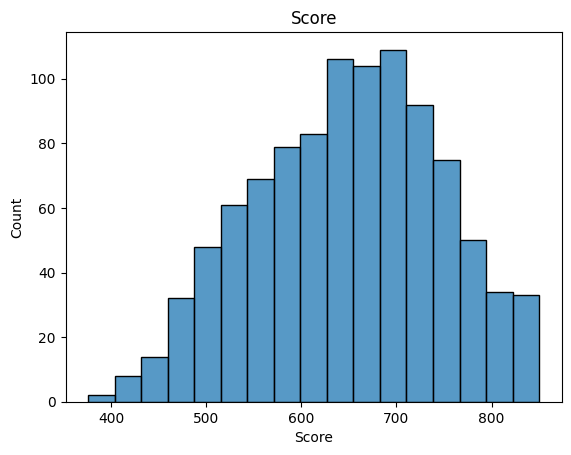

In [46]:
srn.histplot(dataset['Score']).set_title('Score')


In [38]:
dataset['Idade'].describe()


count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

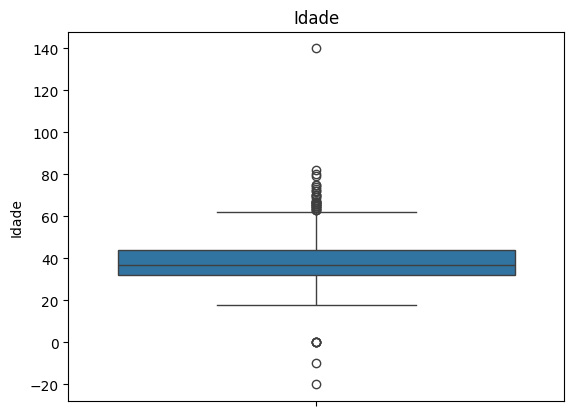

In [39]:
srn.boxplot(dataset['Idade']).set_title('Idade')


Text(0.5, 1.0, 'Idade')

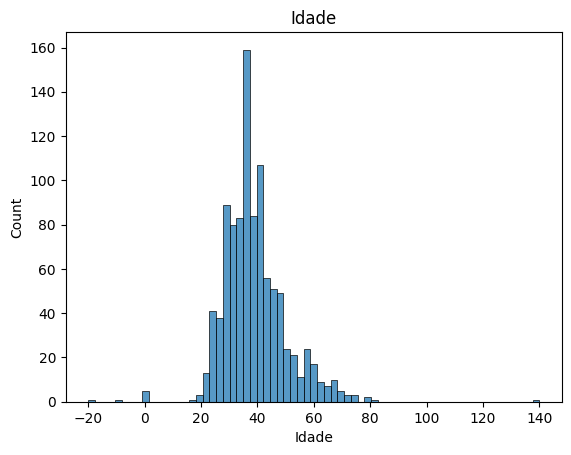

In [45]:
srn.histplot(dataset['Idade']).set_title('Idade')


In [41]:
dataset['Saldo'].describe()


count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

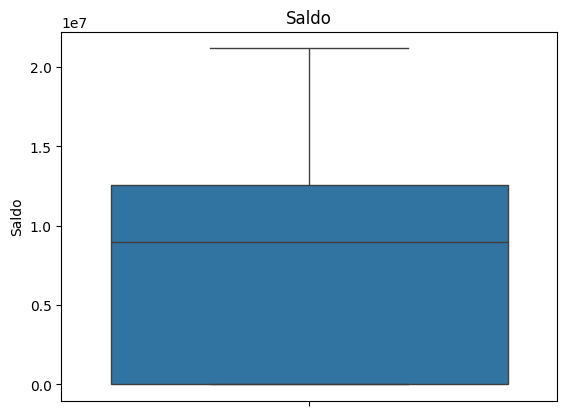

In [42]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

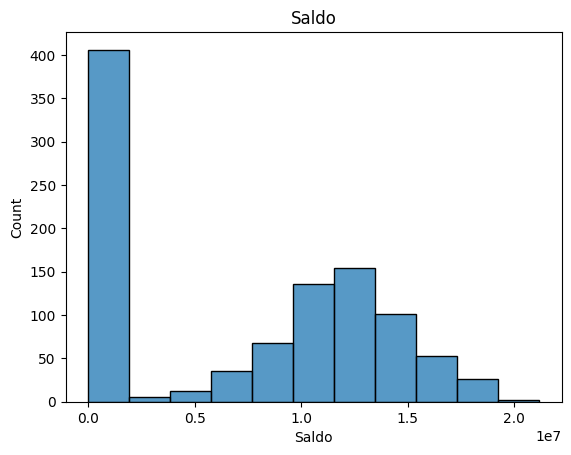

In [44]:
srn.histplot(dataset['Saldo']).set_title('Saldo')


In [47]:
dataset['Salario'].describe()


count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [49]:
#conta em todas as colunas quantas linhas estão sem valores
#contamos valores NAN
#genero e salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

- Após a análise exploratoria dos dados, para entender como eles estão organizados, faremos o tratamento.

In [51]:
#calular a mediana
mediana = sts.median(dataset['Salario'])
mediana


70518.0

In [53]:
dataset['Salario'].fillna(mediana, inplace=True)

In [54]:
dataset['Salario'].isnull().sum()

0

In [56]:
#calular a mediana
medianaIdade = sts.median(dataset['Idade'])
medianaIdade


37

In [57]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100)] = medianaIdade

In [58]:
#idades temos = 0, idade<0
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [81]:
dados_duplicados = dataset[dataset.duplicated(['Id'], keep=False)]
dados_duplicados


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [89]:
# Remover todas as duplicatas com base na coluna 'Id' mantendo apenas uma ocorrência de cada valor único
dados_sem_duplicatas = dataset.drop_duplicates(subset=['Id'], keep='first')


In [87]:


# Visualizar a linha com o número de ID especificado
linha_especifica = dataset.loc[dataset['Id'] == 81]

# Exibir a linha especificada
print(linha_especifica)


Empty DataFrame
Columns: [Id, Score, Estado, Genero, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario, Saiu]
Index: []


In [88]:
#remover linha com o ID
dataset = dataset.drop(dataset[dataset['Id'] == 37].index)



In [90]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"


In [92]:
#Valores incorretos foram atribuidos a moda
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    479
SC    257
dtype: int64

In [94]:
desv = sts.stdev(dataset['Salario'])
desv

530317119.9749016

In [95]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [96]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ]



,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
